___

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

___
**_Bitte beachten:_**

- In Code-Zellen soll (bei Bedarf kommentierter) Code eingefügt werden. In Raw-Zellen erwarten wir Antworten im Freitext-Format.
- Fragestellungen sind teilweise bewusst etwas offener formuliert, weil Sie auch im Arbeitsleben nur selten mit ganz spezifischen Anweisungen rechnen können.Es gibt häufig mehrere mögliche Lösungen, dies wird in der Korrektur  berücksichtigt.

___

# (I can't get no) satisfaction
Wir arbeiten weiterhin mit dem Datensatz über die Zufriedenheit von Angestellten einer fiktiven Firma. In dieser Kurseinheit werden wir einige Techniken zur Datenvisualisierung anwenden.

*Hinweise:*
- *Für die Visualisierungsaufgaben gibt es meist unterschiedliche Lösungswege. Wir verwenden in den meisten Fällen die Bibliothek `matplotlib`. Sie können die Aufgaben auch mit anderen Bibliotheken, wie z.B. `seaborn`, lösen. Denken Sie in dem Fall daran, die entsprechende Bibliothek zu installieren und zu importieren.*
- *Denken Sie bei der Erstellung der Plots an Titel und Achsenbeschriftung!*

**Daten laden**

Wir verwenden nun den transformierten Datensatz aus KE3. Sollten Sie die Aufgaben aus KE3 erfolgreich absolviert haben, können Sie Ihren Datensatz verwenden, ansonsten finden Sie die entsprechende csv-Datei (`employees_satisfaction_transformed.csv`) im Moodle.

In [2]:
# Datensatz laden
# Laden Sie den Datensatz wieder so, dass die erste Spalte als Index (Row Label) verwendet wird
# Wir verwenden hier den transformierten Datensatz aus KE3
df = satisfaction_data = pd.read_csv("employees_satisfaction_transformed.csv", index_col=0)
df.head(5)

,age,department,education,recruitment_type,job_level,rating,awards,certifications,salary,gender,entry_date,last_raise,satisfied
0,28,HR,Postgraduate,Referral,5,2.0,1,0,78075.0,Male,2019-02-01,0.0,1
1,50,Technology,Postgraduate,Recruitment Agency,3,5.0,2,1,38177.1,Male,2017-01-17,0.0,0
2,43,Technology,Undergraduate,Referral,4,1.0,2,0,59143.5,Female,2012-08-27,0.0,1
3,44,Sales,Postgraduate,On-Campus,2,3.0,0,0,26824.5,Female,2017-07-25,0.0,1
4,33,HR,Undergraduate,Recruitment Agency,2,1.0,5,0,26824.5,Male,2019-05-17,0.0,1


Für Datumsberechnungen wandeln wir wieder den Datentyp von `entry_date` um.

In [3]:
df["entry_date"] = pd.to_datetime(df["entry_date"], format="%Y-%m-%d")

In [4]:
df.head(10)

,age,department,education,recruitment_type,job_level,rating,awards,certifications,salary,gender,entry_date,last_raise,satisfied
0,28,HR,Postgraduate,Referral,5,2.0,1,0,78075.0,Male,2019-02-01,0.00,1
1,50,Technology,Postgraduate,Recruitment Agency,3,5.0,2,1,38177.1,Male,2017-01-17,0.00,0
2,43,Technology,Undergraduate,Referral,4,1.0,2,0,59143.5,Female,2012-08-27,0.00,1
3,44,Sales,Postgraduate,On-Campus,2,3.0,0,0,26824.5,Female,2017-07-25,0.00,1
4,33,HR,Undergraduate,Recruitment Agency,2,1.0,5,0,26824.5,Male,2019-05-17,0.00,1
5,40,Purchasing,Undergraduate,Walk-in,3,3.0,7,1,38177.1,Male,2004-04-22,0.02,1
6,26,Purchasing,Undergraduate,Referral,5,5.0,2,0,78075.0,Male,2019-12-10,0.00,1
7,25,Technology,Undergraduate,Recruitment Agency,1,1.0,4,0,21668.4,Female,2017-03-18,0.00,0
8,35,HR,Postgraduate,Referral,3,4.0,0,0,38177.1,Female,2015-04-02,0.00,1
9,45,Technology,Postgraduate,Referral,3,3.0,9,0,38177.1,Female,2004-03-19,0.07,0


## Data Analysis

### Alter

**Wie ist das durchschnittliche Alter der Angestellten? Unterscheidet sich dieses, in Abhängigkeit von der Abteilung?**

In [5]:
# Ihre Lösung

print(df["age"].mean())
print("\n")

#Erstellen neuer Dataframes für die einzelnen Abteilungen
alle_abteilungen = df["department"].unique()
print(alle_abteilungen)
print("\n")

ageAvgList =[]

for abteilung in alle_abteilungen:
    abteilung_df = df[df['department'] == abteilung]
    print(abteilung)
    print(abteilung_df['age'].mean())
    ageAvgList.append(abteilung_df['age'].mean())
    print("\n")

print(max(ageAvgList))
print(min(ageAvgList))
print(max(ageAvgList)-min(ageAvgList))
    


39.70161290322581


['HR' 'Technology' 'Sales' 'Purchasing' 'Marketing']


HR
39.367924528301884


Technology
41.22680412371134


Sales
38.81609195402299


Purchasing
40.13392857142857


Marketing
38.808510638297875


41.22680412371134
38.808510638297875
2.4182934854134643


**In welcher Abteilung arbeitet der älteste Mann, in welcher die jüngste Frau?**

In [6]:
# Ihre Lösung
ageMaxList=[]
ageMinList=[]
depListM=[]
depListF=[]

#Älteste Männer:
#print("Männer:\n")
for abteilung in alle_abteilungen:
    abteilung_df = df[df['department'] == abteilung]
    abteilung_m_df = abteilung_df[df['gender'] == "Male"]
    #print(abteilung)
    #print(abteilung_df['age'].max())
    depListM.append(abteilung)
    ageMaxList.append(abteilung_df['age'].max())

#Index für Abteilung mit ältestem Mann
indexMax = ageMaxList.index(max(ageMaxList))

#print("\nFrauen:\n")
#Älteste Frauen
for abteilung in alle_abteilungen:
    abteilung_df = df[df['department'] == abteilung]
    abteilung_m_df = abteilung_df[df['gender'] == "Female"]
    #print(abteilung)
    #print(abteilung_df['age'].min())
    depListF.append(abteilung)
    ageMinList.append(abteilung_df['age'].min())

#Index für Abteilung mit jüngster Frau
indexMin = ageMinList.index(min(ageMinList))

print("Ältester Mann und Abteilung:\n")
print(str(depListM[indexMax]) +" "+ str(max(ageMaxList)))
print("\nJüngste Frau und Abteilung:\n")
print(str(depListF[indexMin]) +" "+ str(min(ageMinList)))
print("\n\n")



Ältester Mann und Abteilung:

Technology 56

Jüngste Frau und Abteilung:

HR 22





In [7]:
# Abteilung ältester Mann

In [8]:
# Abteilung jüngste Frau

### Awards

**Wie ist die durchschnittliche Anzahl Awards? Wie ist der Median? Welcher Wert ist aussagekräftiger?**

In [9]:
# Ihre Lösung

In [10]:
# Mean
df['awards'].mean()

4.532258064516129

In [11]:
# Median
df['awards'].median()

5.0

### Zufriedenheit

**In welcher Abteilung sind die meisten zufriedenen Angestellten?**

In [12]:
# Ihre Lösung
satMaxList=[]
depSatList=[]

for abteilung in alle_abteilungen:
    abteilung_df = df[df['department'] == abteilung]
    abteilung_satisfied_df = abteilung_df[df['satisfied'] == 1]
    depSatList.append(abteilung)
    satMaxList.append(len(abteilung_satisfied_df))
    print(abteilung)
    print(len(abteilung_satisfied_df))

indexSatMax = satMaxList.index(max(satMaxList))

print("\nAm meisten zufriedene Mitarbeiter in:\n")
print(depSatList[indexSatMax])
print(max(satMaxList))
print("\n\n")

HR
73
Technology
72
Sales
70
Purchasing
80
Marketing
61

Am meisten zufriedene Mitarbeiter in:

Purchasing
80





**Und in welcher Abteilung sind die Angestellten im Schnitt am zufriedensten?**

In [13]:
# Ihre Lösung

#Hierfür müssen Zufriedene Mitarbeiter mit der Gesamtzahl ins Verhältnis gesetzt werden

satMaxList=[]
depRatioList=[]
ratioList=[]

for abteilung in alle_abteilungen:
    abteilung_df = df[df['department'] == abteilung]
    abteilung_satisfied_df = abteilung_df[df['satisfied'] == 1]
    depRatioList.append(abteilung)
    print(abteilung)
    ratio=len(abteilung_satisfied_df)/len(abteilung_df)
    ratioList.append(ratio)
    print(ratio)
indexRatioMax = ratioList.index(max(ratioList))

print("\nDie durschnittlich zufriedensten Mitarbeiter sind in:\n")
print(depRatioList[indexRatioMax])
print(str(max(ratioList)*100)+"%")
print("\n\n")

HR
0.6886792452830188
Technology
0.7422680412371134
Sales
0.8045977011494253
Purchasing
0.7142857142857143
Marketing
0.648936170212766

Die durschnittlich zufriedensten Mitarbeiter sind in:

Sales
80.45977011494253%





### Fairness

**Gender Pay Gap**

Bekommen Männer und Frauen der fiktiven Firma das gleiche Gehalt?

In [14]:
# Ihre Analysen
male_df = df[df['gender'] == "Male"]
female_df = df[df['gender'] == "Female"] 

print("Durchschnittsgehalt Männer: " +str(male_df["salary"].mean()))
print("Durchschnittsgehalt Frauen: " +str(female_df["salary"].mean()))
print("Unterschied in Durschnittsgehalt: "+ str(male_df["salary"].mean()-female_df["salary"].mean()))

anteilGehalt = (male_df["salary"].mean()-female_df["salary"].mean())/((male_df["salary"].mean()+female_df["salary"].mean())/2)
print(anteilGehalt)


Durchschnittsgehalt Männer: 47138.92557251908
Durchschnittsgehalt Frauen: 43560.21818181818
Unterschied in Durschnittsgehalt: 3578.7073907009035
0.0789138076186032


Betrachten Sie den Datensatz weiterhin mit Fokus auf dem Thema *Fairness*. Was fällt Ihnen auf? Welche Aspekte könnte man noch untersuchen?

In [15]:
# Ihre Analysen
#Rating

print("Durschnittliches Rating Frauen: "+ str(female_df["rating"].mean()))
print("Durschnittliches Rating Männer: "+ str(male_df["rating"].mean()))

#Bildung
ratioFemEdu=len(female_df[df["education"]=="Postgraduate"])/len(female_df)

print("\nAnteil Akademiker weiblich:")
print(ratioFemEdu*100)

print("\nAnteil Akademiker männlich:")

ratioMaleEdu=len(male_df[df["education"]=="Postgraduate"])/len(male_df)
print(ratioMaleEdu*100)

print("\nDurschnittliches Alter Frauen: "+ str(female_df["age"].mean()))
print("Durschnittliches Alter Männer: "+ str(male_df["age"].mean()))

Durschnittliches Rating Frauen: 3.0
Durschnittliches Rating Männer: 3.1603053435114505

Anteil Akademiker weiblich:
50.649350649350644

Anteil Akademiker männlich:
51.526717557251914

Durschnittliches Alter Frauen: 39.073593073593074
Durschnittliches Alter Männer: 40.19847328244275


## Data Visualization

### Säulendiagramm

Zur Erinnerung (siehe Buch S.335): Es gelten folgende Aspekte bei Säulendiagrammen:

> **Regel**: Die Säulen müssen bei 0 anfangen!

> **Richtlinie**: Vertikale Balken eignen sich gut für dichtere Daten mit weniger Schwankungen.

> **Richtlinie**: Horizontale Balken sind besser für mehr Variation und/oder längere Labels.

Beschreiben Sie für die folgenden Aufgabenstellungen neben Ihrer Interpretation des Diagramme auch, ob Säulendiagramme für die Fragestellung geeignet sind und wenn nicht, welche Regel/Richtlinien verletzt sind.

**In welchem Department arbeiten die meisten Personen?**

Erstellen Sie zur Beantwortung der Frage ein Säulendiagramm, das die Anzahl Angestellte pro Department darstellt.

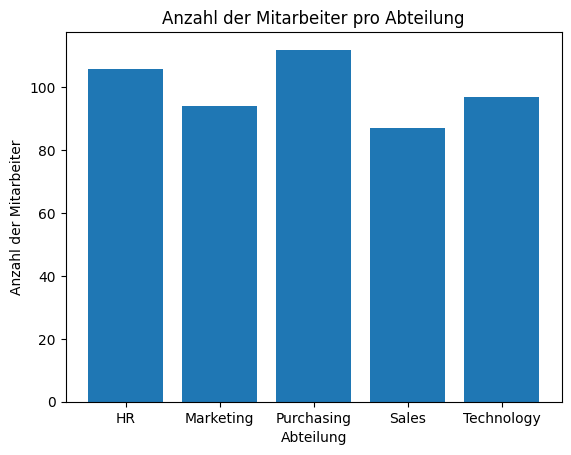

In [16]:
# Ihre Lösung
#import seaborn as sns
gruppiert_nach_abteilung = df.groupby('department').size()
abteilungen = gruppiert_nach_abteilung.index.tolist()
anzahl_mitarbeiter = gruppiert_nach_abteilung.values.tolist()

plt.bar(abteilungen, anzahl_mitarbeiter)
plt.xlabel('Abteilung')
plt.ylabel('Anzahl der Mitarbeiter')
plt.title('Anzahl der Mitarbeiter pro Abteilung')
plt.show()

**Unterscheidet sich die durchschnittliche Anzahl Awards, in Abhängigkeit von der Ausbildung, stark?**

Erstellen Sie hierfür wiederum ein Säulendiagramm.

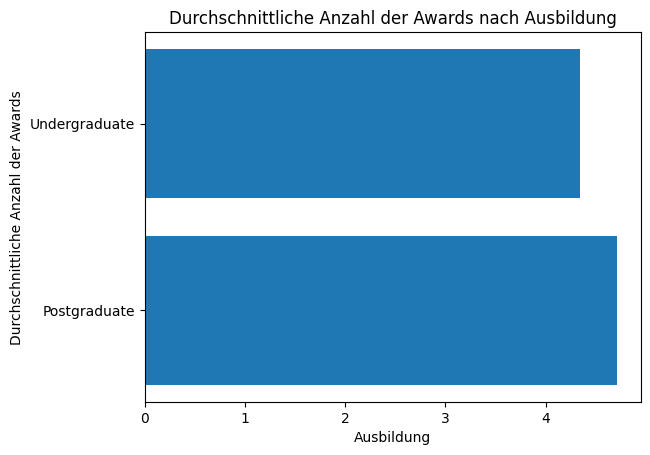

In [17]:
#Ihre Lösung

groupedby_edu = df.groupby('education')['awards'].mean()

ausbildungen = groupedby_edu.index.tolist()
durchschnittliche_awards = groupedby_edu.values.tolist()

plt.barh(ausbildungen, durchschnittliche_awards)
plt.xlabel('Ausbildung')
plt.ylabel('Durchschnittliche Anzahl der Awards')
plt.title('Durchschnittliche Anzahl der Awards nach Ausbildung')
plt.show()


**Sind Angestellte mit einem höheren Gehalt im Schnitt zufriedener?**

Erstellen Sie hierzu ein Liniendiagramm, das pro Gehaltsklasse die durchschnittliche Zufriedenheit angibt.

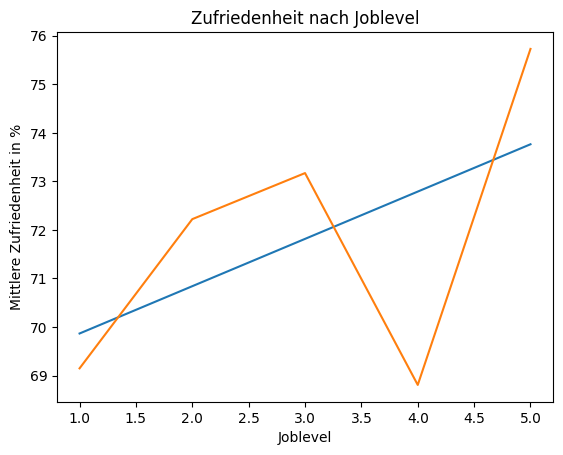

In [18]:
#Ihre Lösung

groupedby_joblvl = df.groupby('job_level')['satisfied'].mean()
job_level = groupedby_joblvl.index.tolist()
satLvl = groupedby_joblvl.values.tolist()
satLvlPer = [i*100 for i in satLvl]
z = np.polyfit(job_level, satLvlPer, 1)
p = np.poly1d(z)
plt.plot(job_level, p(job_level))

plt.xlabel("Joblevel")
plt.ylabel("Mittlere Zufriedenheit in %")
plt.title("Zufriedenheit nach Joblevel")
plt.plot(job_level, satLvlPer, linestyle="solid")
plt.show()

### Liniendiagramm

Zur Erinnerung (siehe Buch S.339): Es gelten folgende Aspekte bei Liniendiagrammen:

> **Regel**: Die Datenpunkte müssen Werte im *Zeitverlauf* darstellen.

> **Richtlinie**: Die Datenpunkte sollten etwa 2/3 des vertikalen Diagrammbereichs einnehmen.

> **Richtlinie**: Vier oder weniger Zeilen sollten deutlich gefärbt/beschriftet sein.

Beschreiben Sie für die folgenden Aufgabenstellungen neben Ihrer Interpretation des Diagramme auch, ob Liniendiagramme für die Fragestellung geeignet sind und wenn nicht, welche Regel/Richtlinien verletzt sind.

**Steigt das durchschnittliche Alter pro Job-Level, fällt es oder bleibt es ungefähr gleich?**

Beantworten Sie diese Frage mithilfe eines Liniendiagramms.

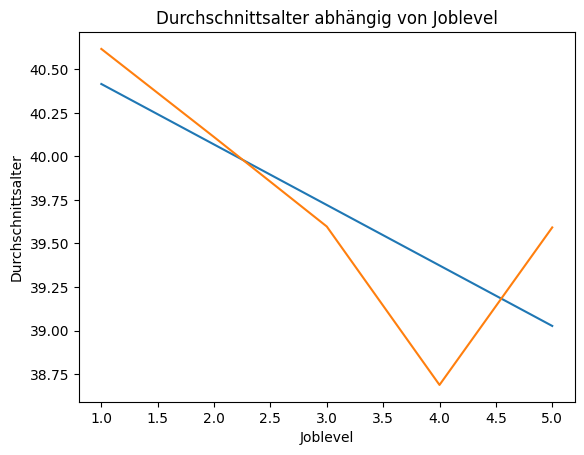

In [19]:
#Ihre Lösung

groupedby_joblvl = df.groupby('job_level')['age'].mean()
job_level = groupedby_joblvl.index.tolist()
ageLvl = groupedby_joblvl.values.tolist()
z = np.polyfit(job_level, ageLvl, 1)
p = np.poly1d(z)
plt.plot(job_level, p(job_level))

plt.xlabel("Joblevel")
plt.ylabel("Durchschnittsalter")
plt.title("Durchschnittsalter abhängig von Joblevel")

plt.plot(job_level, ageLvl, linestyle="solid")
plt.show()

**Verändert sich das Recruiting über die Jahre?**

Erstellen Sie hierzu ein Liniendiagramm, das die Anzahl der Neuanstellungen über die Zeit (`entry_date`) in Abhängigkeit vom Recruitment-Typ darstellt.

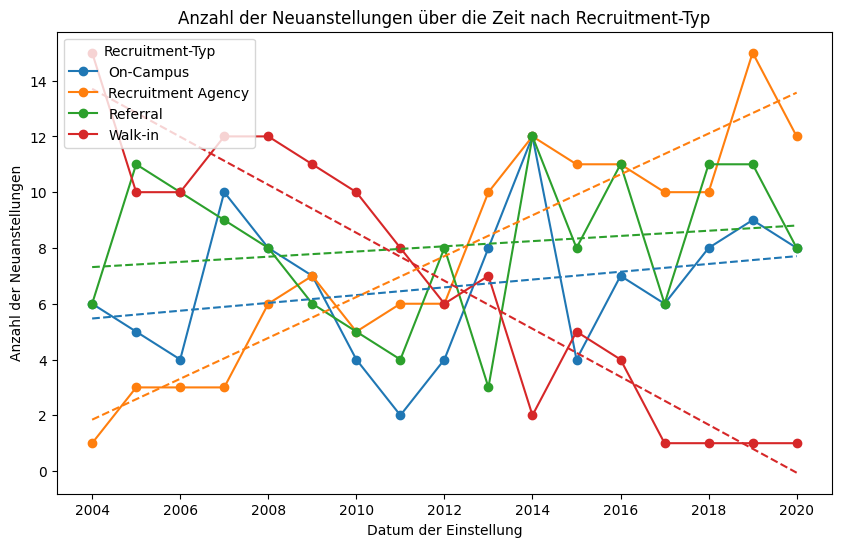

In [20]:
# Ihre Lösung
import datetime

df['entry_date'] = pd.to_datetime(df['entry_date'])
df['entry_date'].values.astype('datetime64[Y]')
df["year"] = pd.DatetimeIndex(df['entry_date']).year

neuanstellungen_nach_jahr_und_typ = df.groupby(['recruitment_type', "year"]).size().unstack()

ax = neuanstellungen_nach_jahr_und_typ.T.plot.line(marker='o', linestyle='-', figsize=(10, 6))
plt.xlabel('Datum der Einstellung')
plt.ylabel('Anzahl der Neuanstellungen')
plt.title('Anzahl der Neuanstellungen über die Zeit nach Recruitment-Typ')
plt.legend(title='Recruitment-Typ', loc='upper left')

for line in ax.lines:
    x, y = line.get_xydata().T
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color=line.get_color())

plt.show()


**Sind Angestellte, die schon länger in der Firma sind, im Schnitt zufriedener?**

Beantworten Sie diese Frage ebenfalls mithilfe eines Liniendiagramms. Gruppieren Sie die Angestellten dafür nach dem Einstellungsjahr (`df["entry_date"].dt.year`).

<Axes.ArtistList of 1 lines>


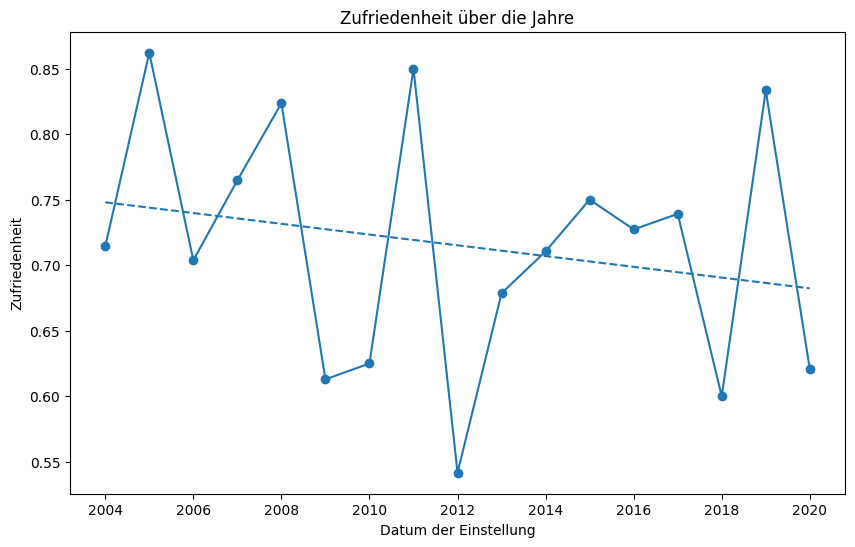

In [21]:
#Ihre Lösung
neuanstellungen_nach_jahr_und_sat = df.groupby("year")["satisfied"].mean()

ax = neuanstellungen_nach_jahr_und_sat.T.plot.line(marker='o', linestyle='-', figsize=(10, 6))
plt.xlabel('Datum der Einstellung')
plt.ylabel('Zufriedenheit')
plt.title('Zufriedenheit über die Jahre')

print(ax.lines)

for line in ax.lines:
    x, y = line.get_xydata().T
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color=line.get_color())

plt.show()

### Kreisdiagramm

Zur Erinnerung (siehe Buch S.330): Es gelten folgende Aspekte bei Liniendiagrammen:

> **Regel**: Die Datenkategorien müssen konzeptionell ein einziges "Ganzes" ergeben.

> **Richtlinie**: Die Anzahl der Kategorien sollte auf fünf oder weniger reduziert werden.

> **Richtlinie**: Der Anteil der hervorzuhebenden Daten sollte 1/4, 1/3, 1/2, 2/3 oder 3/4 der Gesamtmenge betragen.

Beschreiben Sie für die folgenden Aufgabenstellungen neben Ihrer Interpretation des Diagramme auch, ob Kreisdiagramme für die Fragestellung geeignet sind und wenn nicht, welche Regel/Richtlinien verletzt sind.

**Gibt es Abteilungen, in denen mehr Frauen als Männer arbeiten?**

Beantworten Sie diese Frage mithilfe von Kreisdiagrammen (ein Kreisdiagramm pro Abteilung).

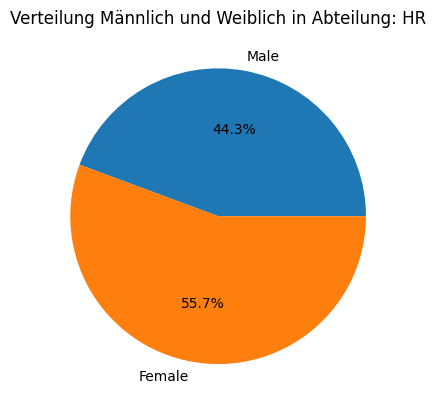

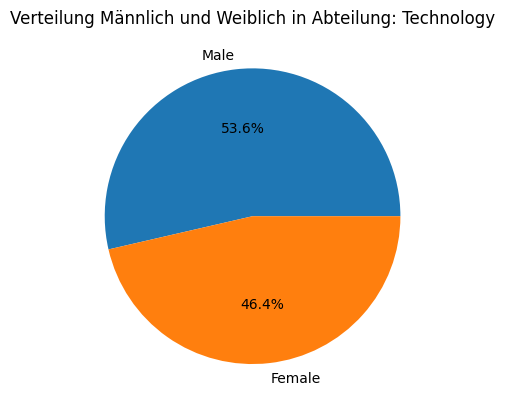

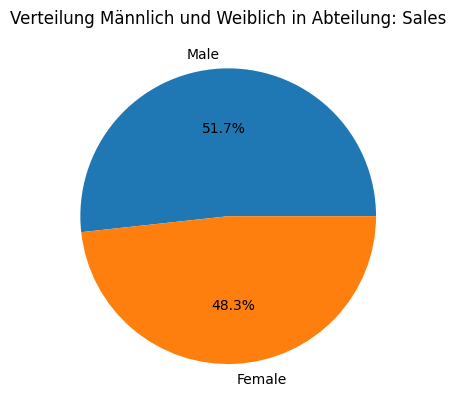

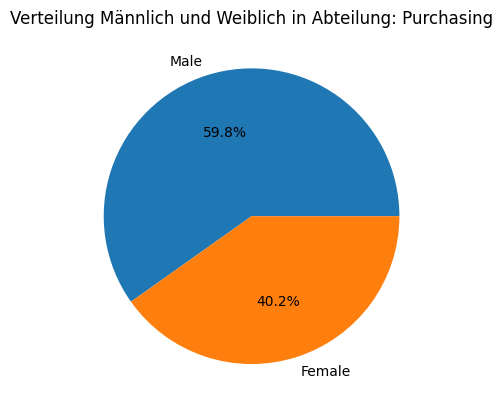

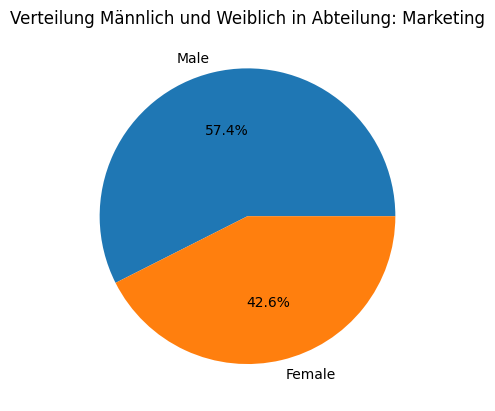

In [25]:
# Ihre Lösung

for abteilung in alle_abteilungen:
    abteilung_df = df[df["department"]==abteilung]
    abteilungFemale = abteilung_df[df["gender"]=="Female"]
    perFem = len(abteilungFemale)/len(abteilung_df)
    perMale = 1-perFem
    perList = [perMale,perFem]
    genderList = ["Male", "Female"]
    plt.title("Verteilung Männlich und Weiblich in Abteilung: "+ str(abteilung))
    plt.pie(perList, labels= genderList, autopct='%1.1f%%')
    plt.show()


**In Abhängigkeit vom Education-Typ: Welche Angestellten haben mehr Awards?**

Beantworten Sie diese Frage mithilfe von Kreisdiagrammen (ein Kreisdiagramm pro Education-Typ).